### Домашнее задание 
1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод
2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.
3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
4. *Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

## Задание 1

#### Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [5]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8, log=False):
    np.random.seed(1234)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if (i % (iterations / 10) == 0) and log:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    if log:
        print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return np.append(W, err)

In [6]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [7]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

In [8]:
reg_range = np.linspace(1e-4, 10, 100)

In [9]:
W_range = np.array([gradient_descent_reg_l2(X_st, y, iterations=1000, eta=1e-2, reg=reg_i) for reg_i in reg_range])

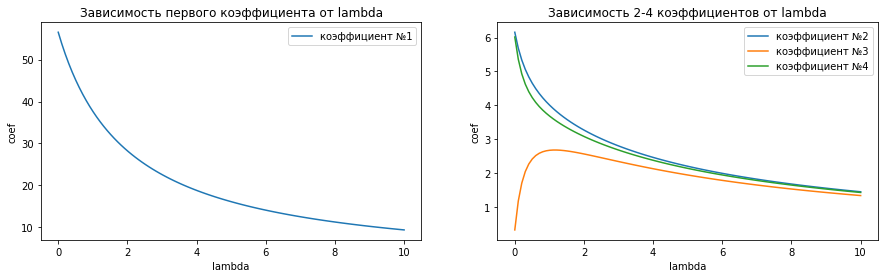

In [10]:
plt.figure(figsize=(15,4))

plt.subplot(121)
plt.plot(reg_range, W_range[:,0], label='коэффициент №1')
plt.legend()
plt.title('Зависимость первого коэффициента от lambda')
plt.xlabel('lambda')
plt.ylabel('coef')

plt.subplot(122)
plt.plot(reg_range, W_range[:,1], label='коэффициент №2')
plt.plot(reg_range, W_range[:,2], label='коэффициент №3')
plt.plot(reg_range, W_range[:,3], label='коэффициент №4')
plt.title('Зависимость 2-4 коэффициентов от lambda')
plt.xlabel('lambda')
plt.ylabel('coef')
plt.legend()

plt.show()

In [11]:
W_range[0]

array([56.49717505,  6.15561457,  0.32476027,  6.01511048, 24.98614943])

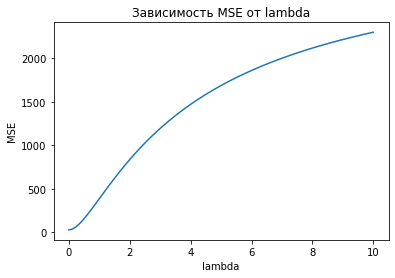

In [12]:
plt.plot(reg_range, W_range[:,4])
plt.title('Зависимость MSE от lambda')
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.show()

Выводы: 

При увеличении коэффициента регуляризации наблюдаем, что значения коэффициентов регрессии снижаются, происходит выравнивание величин весов. Это позволяет исключить переобучение модели. 
С другой стороны мы видем рост MSE которая обусловлена вводимой поправкой. Что указывает нам о необходимость поиска баланса между величиной регуляризации и MSE 

## Задание 2

#### Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [13]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8, log=False):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if (i % (iterations / 10) == 0) and log:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    if log:
        print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [14]:
reg_range = np.linspace(1, 125, 100)

In [15]:
W1_range = np.array([gradient_descent_reg_l1(X_st, y, iterations=1000, eta=1e-2, reg=reg_i) for reg_i in reg_range])

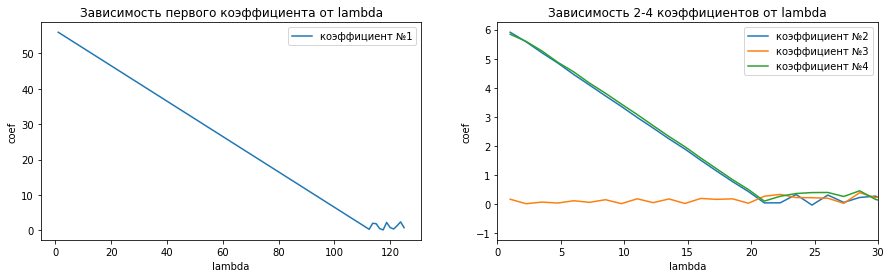

In [16]:
plt.figure(figsize=(15,4))

plt.subplot(121)
plt.plot(reg_range, W1_range[:,0], label='коэффициент №1')
plt.legend()
plt.title('Зависимость первого коэффициента от lambda')
plt.xlabel('lambda')
plt.ylabel('coef')

plt.subplot(122)
plt.plot(reg_range, W1_range[:,1], label='коэффициент №2')
plt.plot(reg_range, W1_range[:,2], label='коэффициент №3')
plt.plot(reg_range, W1_range[:,3], label='коэффициент №4')
plt.title('Зависимость 2-4 коэффициентов от lambda')
plt.xlabel('lambda')
plt.ylabel('coef')
plt.xlim(0,30)
plt.legend()
plt.show()

## Задание 3

#### Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

К одному и тому же признаку можно применить сразу и нормализацию, и стандартизацию. Хотя практической пользы от этого я не вижу. 

Алгоритмы нормализации и стандартизации это линейное преобразование данных. Оно не приводит к изменению (утере) информации, не нарушает её «информативную целостность». 
Следовательно применение поочерёдно этих алгоритмов также не приведёт к изменению (утере) информации. 


## Задание 4

#### Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [17]:
X, Y, coef = datasets.make_regression(n_samples=100000, n_features=10, n_informative=10, n_targets=1, 
                                      noise=5, coef=True, random_state=42)

In [18]:
display(X, Y, coef)

array([[ 0.51368361, -0.66330527, -0.40696073, ..., -0.09694975,
         0.25866947, -1.69837299],
       [ 0.69463336, -0.62574181,  0.29074692, ..., -1.142611  ,
         1.69340761, -0.92591758],
       [-0.70606755, -0.73210014, -0.39961674, ..., -0.16242892,
        -0.33120542,  0.30409075],
       ...,
       [-1.03489528, -0.02453621,  0.53437652, ...,  0.56586544,
         1.06439272, -1.4896636 ],
       [-2.28948661, -0.11161351,  1.60721448, ...,  0.50435473,
         1.13352304,  1.89681427],
       [ 1.07430713,  0.41342991, -0.66153237, ..., -0.47508578,
        -0.0869007 ,  1.0127236 ]])

array([-142.97459013,  -50.46577909, -294.8949905 , ..., -178.72734075,
       -231.36966908,  -41.18020703])

array([84.91182137, 56.03943168, 20.57151397, 63.25788887, 21.14662516,
       40.2144315 , 90.17260756, 82.68617283, 71.5561938 , 32.68296277])

In [19]:
def mserror(X, w, y):
    y_pred = X.dot(w)
    return (np.sum((y_pred - y)**2)) / len(y)

In [20]:
def SDG(X, eta=0.01, max_iter = 1e3, min_weight_dist = 1e-8, log=False ):
    w = np.zeros(X.shape[1])
    w_list = [w.copy()]
    errors = []
    weight_dist = np.inf
    iter_num = 0
    np.random.seed(1234)
# ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
        train_ind = np.random.randint(X.shape[0], size=1)
        y_pred = np.dot(X[train_ind], w)
        new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        error = mserror(X, new_w, Y)
        w_list.append(new_w.copy())
        errors.append(error)
        if iter_num % 100 == 0 and log:
            print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')
        iter_num += 1
        w = new_w
    w_list = np.array(w_list)
    print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
    print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors[-1], 4)}')
    return errors

In [21]:
def DG(X, eta=0.01, max_iter = 1e3, min_weight_dist = 1e-8, log=False ):
    w = np.zeros(X.shape[1])
    w_list = [w.copy()]
    errors = []
    weight_dist = np.inf
    iter_num = 0
    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
        y_pred = np.dot(X, w)
        dQ = 2 / Y.shape[0] * np.dot(X.T, y_pred - Y)
        new_w = w - eta * dQ
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        error = mserror(X, new_w, Y)
        w_list.append(new_w.copy())
        errors.append(error)
        if iter_num % 100 == 0 and log:
            print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
        iter_num += 1
        w = new_w
    w_list = np.array(w_list)
    w_pred = w_list[-1]
    print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
    print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    return errors   

In [22]:
%%time
sgd = SDG(X)

Iter 1000: error - 28.017521921675215, weights: [84.94337175 56.089476   21.1236253  62.30829619 21.15868283 40.61578166
 89.59460617 83.35929298 71.35554351 33.43172616]
В случае использования стохастического градиентного спуска ошибка составляет 28.0175
Wall time: 1.29 s


In [23]:
%%time
gd = DG(X)

Iter 977: error - 25.3070726449465, weights: [84.92278305 56.05555495 20.56439688 63.24445738 21.14876308 40.20913921
 90.17845423 82.67931838 71.53127716 32.70015975]
В случае использования градиентного спуска функционал ошибки составляет 25.3071
Wall time: 2.8 s


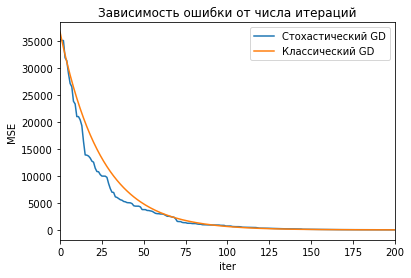

In [24]:
plt.plot(range(len(sgd)), sgd, label='Стохастический GD')
plt.plot(range(len(gd)), gd, label='Классический GD')
plt.title('Зависимость ошибки от числа итераций')
plt.xlabel('iter')
plt.ylabel('MSE')
plt.legend()
plt.xlim(0,200)
plt.show()

Выводы: стохастический градиентный спуск даёт выигрыш по времени исполнения. При этом итоговое значение MSE изменяется не значительно.